# CA2 - Statistical Insights on Agriculture in Ireland and EU

## Overview

In this section ... insights on agriculture ... different aspects .... applying inferential statistics to find insights ...

### Confidence Interval

#### Organic Farming

Eurostat provides yearly data on the percent of UAA (utilized agricultural area) under organic farming per country in Europe.

Problem: What is the average percent of land of the total UAA that is occupied by organic farming in Europe as a whole? How does it compare to Ireland?

- Available data:

    * Percent of total UAA under organic farming per year by country.

- Approach:

    * Use countries data (samples) to find a confidence interval for the total UAA under organic farming in Europe (population) per year. 

    * Compare the growth rate of organic farming in Europe with Ireland.

In [45]:
import pandas as pd

# showing raw dataset
dataset = pd.read_csv('./datasets/stats/organic-farming.csv')
dataset.head()

,GEO (Codes),GEO (Labels),2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,EU,"European Union (EU6-1958, EU9-1973, EU10-1981,...",3.0,:,3.8,4.0,:,3.8,4.1,4.0,...,5.4,5.66,5.70,5.78,6.20,6.68,7.03,7.50,7.92,9.08
1,EU27_2020,European Union - 27 countries (from 2020),:,:,:,:,:,:,:,:,...,:,5.88,5.91,6.08,6.56,7.09,7.48,8.03,8.49,9.08
2,EU28,European Union - 28 countries (2013-2020),:,:,:,:,:,:,:,:,...,:,5.64,5.70,5.78,6.20,6.68,7.03,7.50,7.92,:
3,BE,Belgium,1.5,1.6,2.1,1.7,1.7,1.7,2.1,2.4,...,4.1,4.48,4.67,5.00,5.17,5.80,6.28,6.56,6.85,7.25
4,BG,Bulgaria,:,:,:,:,:,0.2,0.1,0.3,...,0.5,0.76,1.13,0.96,2.37,3.20,2.72,2.56,2.34,2.30


In [173]:
# reloading data - avoid errors
dataset = pd.read_csv('./datasets/stats/organic-farming.csv')

# cleaning rows to keep only countries data
codesCol = dataset.keys()[0]
dataset = dataset.loc[~dataset[codesCol].str.contains('EU')]

# getting Ireland's data only
dataset_ire = dataset.loc[dataset[codesCol] =='IE']

# removing first two columns with labels
dataset = dataset.iloc[:,2:]
dataset_ire = dataset_ire.iloc[:,2:]

# converting data into numbers
columns = dataset.keys()
for c in columns:
    dataset[c] = pd.to_numeric(dataset[c], errors='coerce')
    dataset_ire[c] = pd.to_numeric(dataset_ire[c], errors='coerce')

dataset.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,16.000000,16.000000,17.000000,20.000000,26.000000,29.000000,28.000000,28.000000,28.000000,28.000000,...,27.000000,30.000000,33.000000,33.000000,34.000000,33.000000,34.000000,33.000000,34.000000,33.000000
mean,3.537500,3.968750,4.211765,4.380000,4.111538,4.475862,4.667857,4.850000,5.182143,5.592857,...,6.311111,6.631000,6.146970,6.339394,6.532059,7.208788,7.424706,8.031212,8.236176,8.639091
std,3.523043,3.561782,3.463720,3.452017,3.380808,3.624781,3.687120,3.651129,3.824681,4.178865,...,4.816744,4.676364,4.862754,5.001229,5.175618,5.529636,5.996805,6.265392,6.544499,6.679408
min,0.600000,0.700000,0.700000,0.200000,0.000000,0.100000,0.100000,0.300000,0.300000,0.200000,...,0.200000,0.320000,0.060000,0.270000,0.170000,0.210000,0.250000,0.350000,0.290000,0.290000
25%,1.200000,1.600000,2.100000,2.150000,1.725000,1.900000,2.000000,1.875000,2.075000,2.550000,...,2.850000,3.200000,2.650000,2.670000,2.490000,3.200000,2.965000,3.330000,3.017500,3.520000
50%,1.800000,2.300000,2.600000,3.450000,3.400000,4.200000,4.000000,4.600000,5.200000,5.150000,...,5.400000,5.540000,5.230000,5.050000,5.055000,6.050000,6.370000,6.940000,7.455000,8.000000
75%,5.900000,6.375000,6.500000,6.550000,6.250000,6.800000,7.200000,6.700000,7.350000,7.650000,...,8.300000,8.920000,8.180000,9.290000,9.315000,9.750000,9.825000,10.010000,10.905000,11.670000
max,13.800000,14.000000,14.500000,15.400000,16.000000,16.700000,16.700000,17.000000,17.400000,18.500000,...,19.600000,18.620000,18.400000,19.350000,20.300000,21.250000,23.370000,24.080000,25.330000,25.690000


In [ ]:
# checking empty values on full dataset
dataset.isnull().sum()

In [ ]:
# checking empty values on ireland dataset
dataset_ire.isnull().sum()

In [182]:
from math import sqrt
from scipy import stats
import numpy as np

def getNonEmptyValues(col_data):
    """
    This function removes empty rows from data frame series (column).

    Parameters:
        col_data (pd.Series): DataFrame series
    Returns:
        Non empty rows
    """
    null_filter = col_data.notnull()
    return col_data[null_filter]

def confidenceIntervalTStudent(mean, std, n, alpha=.97):
    """
    This function calculates the confidence interval for the given paramters.
    
    Parameters:
        mean (num): Average of the sample
        std  (num): Standard deviation of the sample
        n    (int): Size of sample
    Returns:
        (num, num): (lower limit, upper limit)
    """
    t = abs(stats.t.ppf((1 - alpha)/2, n - 1))
    interval = t * std/sqrt(n - 1)
    return mean - interval, mean + interval

def getStatsArray(stats_dict, val='mean'):
    """
    This function extracts the stats from the dictionary into a numpy array.
    
    Parameters:
        stats_dict (dict): Dictionary with custom statistics
        val         (str): Measurement to return (must be one of [mean, std, count, ll, ul])
    Returns:
        np array with values as per parameter or empty if input is invalid.
    """
    if val not in ['mean', 'std', 'count', 'll', 'ul']:
        return np.array([])
    return np.array(list([stats_dict[year][val] for year in stats_dict]))

In [ ]:
# calculate descriptive stats (standard deviation and average) of the sample data 
stats_dict = {}
for c in columns:
    dataset_c = getNonEmptyValues(dataset[c])
    desc_stats = dataset_c.describe()
    stats_dict[c] = {'std': desc_stats.loc['std'], 'mean': desc_stats.loc['mean'], 'count': desc_stats.loc['count']}
    stats_dict[c]['ll'], stats_dict[c]['ul'] = confidenceIntervalTStudent(desc_stats.loc['mean'], desc_stats.loc['std'],  desc_stats.loc['count'])
stats_dict

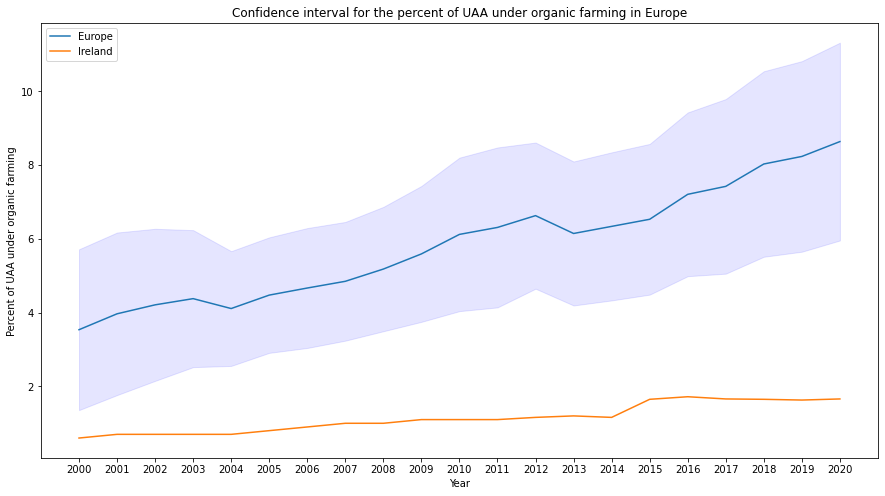

In [199]:
# plot grapth with the ranges and ireland only data to compare the growht
from matplotlib import pyplot as plt

# get x data
x = np.array(list(stats_dict.keys()))

# get y data
y = getStatsArray(stats_dict, 'mean')

# get ll data
ll = getStatsArray(stats_dict, 'll')

# get ul data
ul = getStatsArray(stats_dict, 'ul')

# get ireland's data only
ire = dataset_ire.to_numpy().reshape(x.shape[0],)

# plot graph with europe and irelands data
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(x, y, label='Europe')
ax.set_title('Confidence interval for the percent of UAA under organic farming in Europe')
ax.set_xlabel('Year')
ax.set_ylabel('Percent of UAA under organic farming')
ax.fill_between(x, ll, ul, color='b', alpha=.1)
ax.plot(x, ire, label='Ireland')
plt.legend(loc=2)